In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<ipython-input-6-64e3b3d357cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'], palette="husl")  # You can use different palettes like "viridis", "coolwarm", etc.


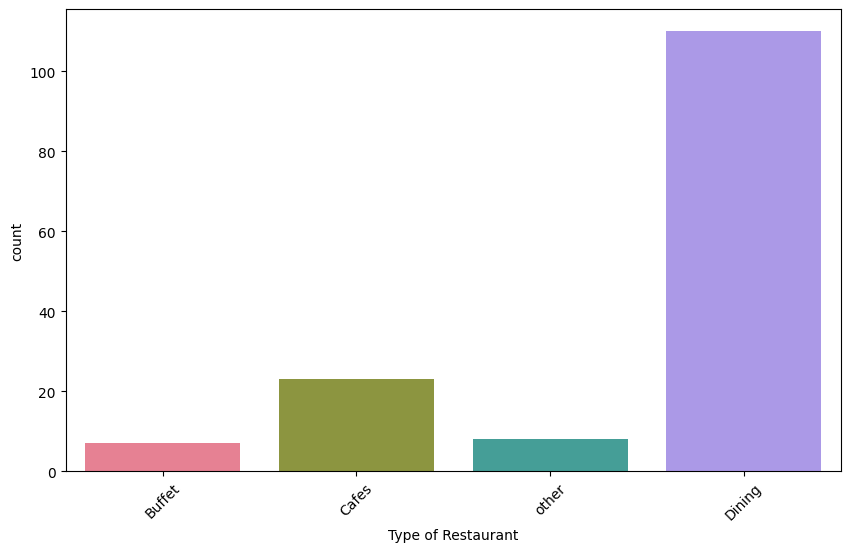

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x=dataframe['listed_in(type)'], palette="husl")  # You can use different palettes like "viridis", "coolwarm", etc.
plt.xlabel("Type of Restaurant")
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()


Text(0, 0.5, 'Votes')

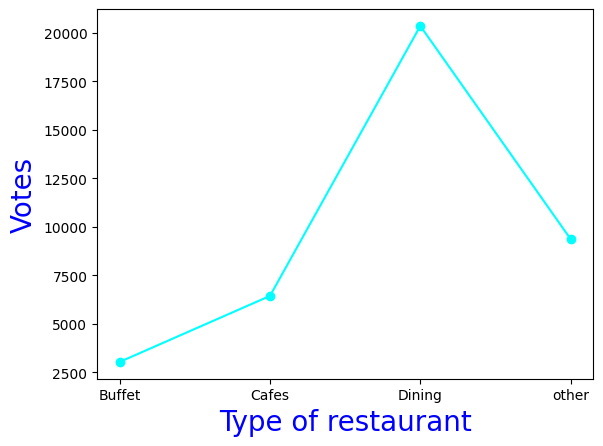

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='cyan', marker='o')
plt.xlabel('Type of restaurant', c='blue', size=20)
plt.ylabel('Votes', c='blue', size=20)

In [8]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<ipython-input-13-f5e1b813cbec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'], palette={"No": "red", "Yes": "green"})


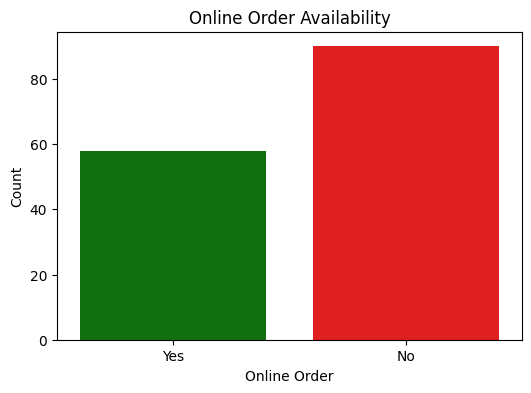

In [13]:
plt.figure(figsize=(6,4))
# Define custom colors: red for "No", green for "Yes"
sns.countplot(x=dataframe['online_order'], palette={"No": "red", "Yes": "green"})
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.title("Online Order Availability")
plt.show()


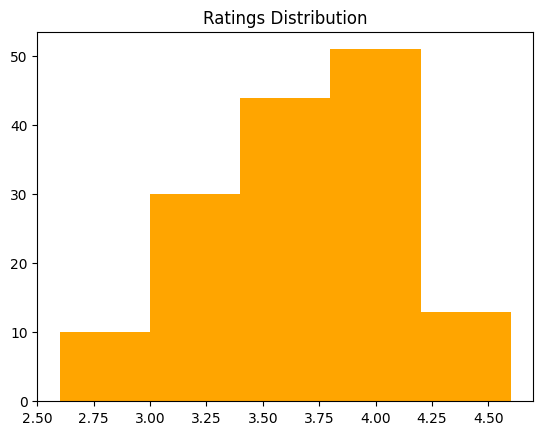

In [31]:

plt.hist(dataframe['rate'],bins=5,color="orange")
plt.title('Ratings Distribution')
plt.show()

<ipython-input-19-b753628ae7d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['approx_cost(for two people)'], palette="husl")


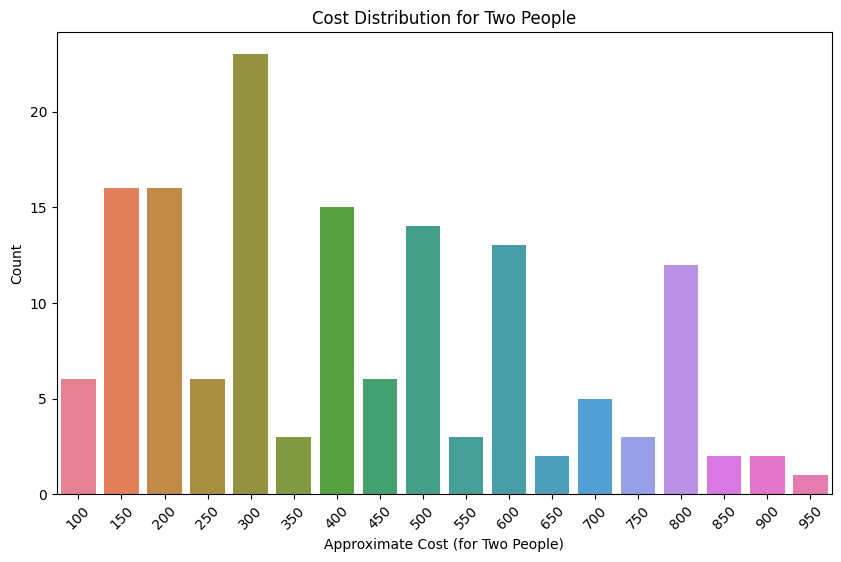

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=dataframe['approx_cost(for two people)'], palette="husl")

plt.xlabel("Approximate Cost (for Two People)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Cost Distribution for Two People")
plt.show()


<ipython-input-21-81c428a827d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=dataframe, palette={"No": "red", "Yes": "green"})


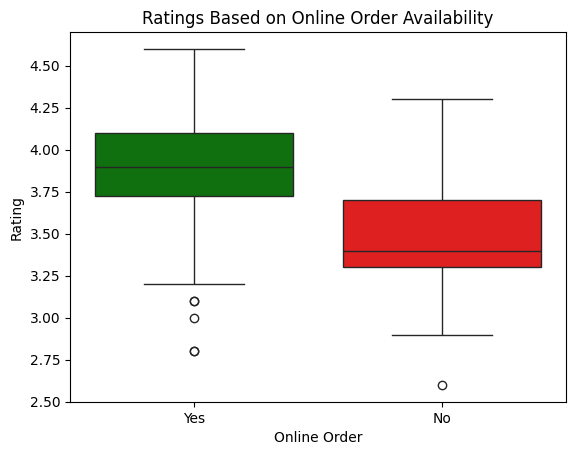

In [21]:
sns.boxplot(x='online_order', y='rate', data=dataframe, palette={"No": "red", "Yes": "green"})

plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Ratings Based on Online Order Availability")
plt.show()


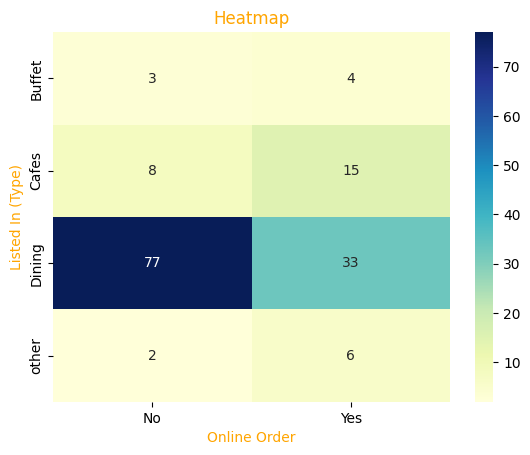

In [35]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap='YlGnBu', fmt='d')
plt.title('Heatmap',color="orange")
plt.xlabel('Online Order',color="orange")
plt.ylabel('Listed In (Type)',color="orange")
plt.show()